In [1]:
'''Thực hiện KNN nhưng ko sử dụg Knn_sklearn'''
import numpy as np
from collections import Counter
def distances_cal(x1, x2):
    distance = np.sqrt(np.sum((x1, x2)**2))
    return distance

In [2]:
#KNN khong su dung thu vien sklearn.k_nearest_neighbor
import numpy as np
from collections import Counter
#ham tinh khoang cach euclide
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance
#class thuc hien knn
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [3]:
#KNN su dung thu vien sklearn
from sklearn import neighbors
_knn = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')

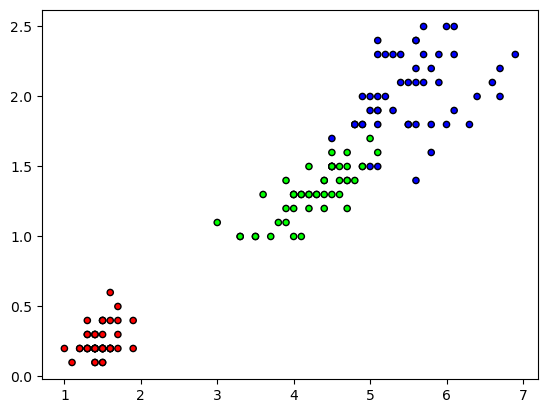

In [4]:
#bieu dien dataset iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as lc
cmap = lc(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
x, y = iris.data, iris.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 45)

plt.figure()
plt.scatter(x[:,2], x[:,3], c=y, cmap = cmap, edgecolor = 'k', s=20)
plt.show()

In [5]:
knn = KNN(k=10)
knn.fit(x_train, y_train)
_knn.fit(x_train, y_train)
pre = knn.predict(x_test)
_pre = _knn.predict(x_test)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pre))
print(classification_report(y_test, _pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.87      1.00      0.93        13
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.81      1.00      0.90        13
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.95      0.93      0.93        45



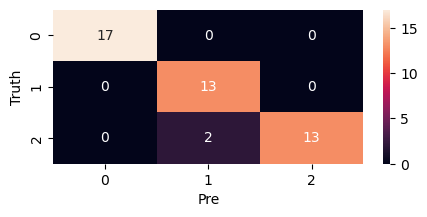

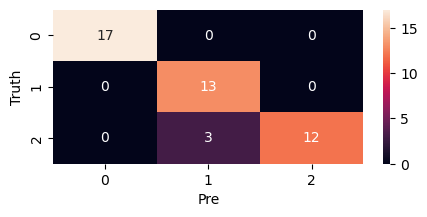

In [7]:
cf = confusion_matrix(y_test, pre)
_cf= confusion_matrix(y_test, _pre)
#bieu do de hieu confusion matrix
import seaborn as sn
def pyplot(case):
    plt.figure(figsize = (5,2))
    sn.heatmap(case, annot = True)
    plt.xlabel('Pre')
    plt.ylabel('Truth')
pyplot(cf)
pyplot(_cf)
